In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [45]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('18-pci-final.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(axis=0, inplace=True)

df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('18-pci-final-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('18-pci-final-cleaned.csv')

any nan = False
all finite = True


In [46]:
# Take a quick look at the dataset
df.head()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
0,0.000,3.800,0.000,0.320,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.400,0.000,0.000,0.000,0.000,0.000,1.550,36.000
1,0.000,1.590,0.000,1.700,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.090,0.000,0.000,0.000,2.220,0.000,1.250,56.000
2,0.000,0.930,0.000,0.750,3.640,0.000,0.740,0.000,0.000,0.000,0.000,0.340,0.000,0.000,0.260,0.000,0.000,0.330,46.000
3,0.000,11.970,2.990,0.000,1.220,0.000,0.000,0.430,0.000,0.000,0.250,0.000,0.000,0.000,0.000,0.000,2.970,0.000,45.000
4,0.000,1.330,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.320,0.000,87.000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC1     502 non-null    float64
 1   AC2     502 non-null    float64
 2   AC3     502 non-null    float64
 3   BE1     502 non-null    float64
 4   BE2     502 non-null    float64
 5   BE3     502 non-null    float64
 6   D1      502 non-null    float64
 7   D2      502 non-null    float64
 8   D3      502 non-null    float64
 9   F1      502 non-null    float64
 10  F2      502 non-null    float64
 11  F3      502 non-null    float64
 12  G1      502 non-null    float64
 13  G2      502 non-null    float64
 14  G3      502 non-null    float64
 15  H1      502 non-null    float64
 16  H2      502 non-null    float64
 17  H3      502 non-null    float64
 18  PCI     502 non-null    float64
dtypes: float64(19)
memory usage: 74.6 KB


In [48]:
df.describe()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
count,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000,502.000
mean,0.391,0.666,0.624,0.155,0.425,0.457,0.162,0.269,0.205,0.038,0.026,0.028,0.036,0.060,0.079,0.059,0.143,0.088,59.388
std,0.518,0.921,0.914,0.362,0.655,0.660,0.288,0.376,0.355,0.158,0.085,0.102,0.130,0.174,0.210,0.219,0.451,0.289,20.244
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,46.500
50%,0.200,0.430,0.330,0.000,0.150,0.150,0.000,0.120,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,60.000
75%,0.600,0.992,0.865,0.122,0.620,0.658,0.228,0.448,0.252,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,74.000
max,3.050,11.970,12.500,2.770,5.600,4.560,1.910,2.600,3.200,2.100,0.900,1.200,1.200,1.620,2.000,2.400,3.200,3.080,100.000


#### Creation of Linear Regression Objects

In [49]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['PCI'],axis=1)

# Choose the response variable 'y' 
y = df.PCI



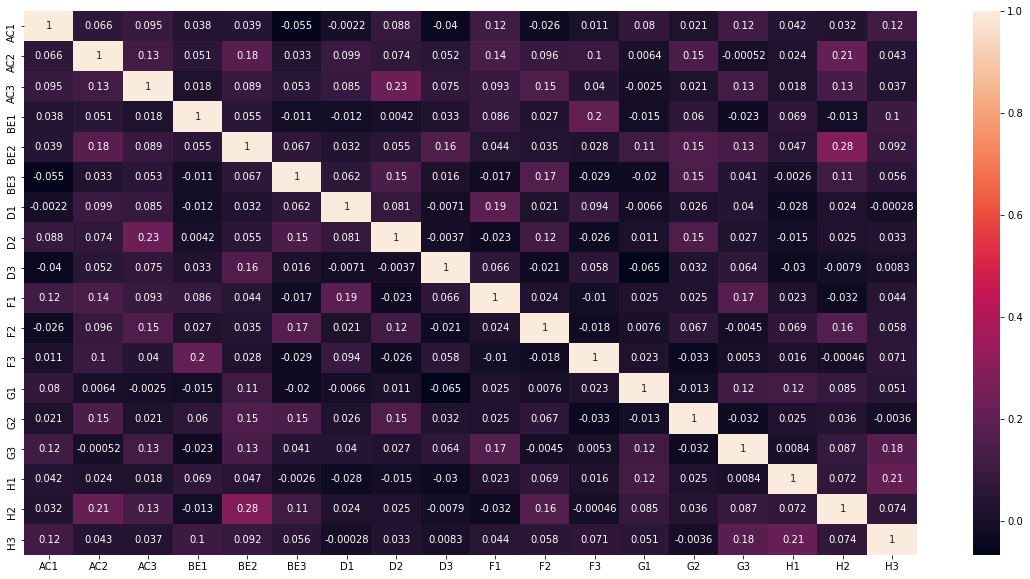

In [50]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [51]:

# sns.pairplot(X)

In [52]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [53]:
# start = 0
# r2_list = []
# for rs in range(50):
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=33)


# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)
print(f"test_r2 = {multi_linear.score(X_test,y_test)}")
print(f"train_r2 = {multi_linear.score(X_train,y_train)}")
# r2_list.append(multi_linear.score(X_test,y_test))

# for i,r2 in enumerate(r2_list):
#     if r2>0.55 and r2< 1.62:
#         print(f"{i+start}: {r2}")

# old
# test_r2 = 0.5884408236956802
# train_r2 = 0.5873320767346488


test_r2 = 0.6126270493290431
train_r2 = 0.5995677038713767


#### Printing the individual $\beta$ values

In [54]:
print(f"Coefficients: {multi_coef}")
print(f"Intercept: {multi_linear.intercept_}")



Coefficients: [ -3.74926084  -1.24151345  -4.49614884   3.59139762  -2.00998012
  -3.01524777  -4.44149863  -0.38492819 -13.69335595 -22.21409578
 -67.38434656 -82.20830864  -6.74709801  -4.31341306  -7.68660037
   1.24424106  -1.98814857  -9.89452593]
Intercept: 76.62349216911403


line: y = 0.6025380897988852 * x + 22.0182011143335


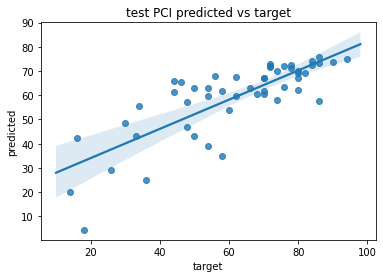

In [55]:

x_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=y_test, y=x_test_prediction)
ax.set(title = 'test PCI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

line: y = 0.599567703871376 * x + 23.670787172481425


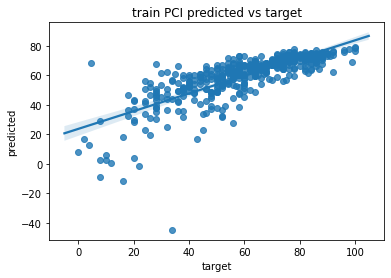

In [56]:
x_train_prediction = multi_linear.predict(X_train)

# less_than_zero_indices = np.where(x_train_prediction<0)[0]
# x_train_prediction = np.delete(x_train_prediction, less_than_zero_indices)
# y_train_new = y_train.drop(less_than_zero_indices, axis=0)


ax = sns.regplot(x=y_train, y= x_train_prediction)
ax.set(title = 'train PCI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

In [57]:
# Now using the stat

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=33)

# Assuming you have your data stored in X and y
# X should be a 2-dimensional array (or DataFrame) containing your features
# y should be a 1-dimensional array (or Series) containing your target

# Fit the linear regression model using sklearn
# sklearn_model = LinearRegression()
# sklearn_model.fit(X, y)

# Add a constant term to the features (intercept) for statsmodels
X_train_with_constant = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
statsmodel = sm.OLS(y_train, X_train_with_constant)
results = statsmodel.fit()

# Access the p-values for each coefficient
p_values = results.pvalues
pd.options.display.float_format = '{:.3f}'.format
greater_than_01 = p_values[p_values.index[p_values > 0.1]]
print(p_values)
print("\n\n p_values greater than 0.1")
print(greater_than_01)
count = greater_than_01.count()

# filtered = filter(lambda x: x > 0.1 , p_values)
# print((pd.Series(filtered)))
# print(p_values)

results.summary()



const   0.000
AC1     0.003
AC2     0.083
AC3     0.000
BE1     0.037
BE2     0.046
BE3     0.002
D1      0.045
D2      0.823
D3      0.000
F1      0.000
F2      0.000
F3      0.000
G1      0.153
G2      0.234
G3      0.012
H1      0.663
H2      0.168
H3      0.000
dtype: float64


 p_values greater than 0.1
D2   0.823
G1   0.153
G2   0.234
H1   0.663
H2   0.168
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PCI   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     35.94
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           3.32e-74
Time:                        09:38:10   Log-Likelihood:                -1789.3
No. Observations:                 451   AIC:                             3617.
Df Residuals:                     432   BIC:                             3695.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.6235      1.190     64.371      0.000      74.284      78.963
AC1           -3.7493      1.238     -3.028      0.003      -6.183      -1.316
AC2           -1.2415      0.715     -1.735      0.083      -2.648       0.165
AC3           -4.4961      0.695     -6.467      0.000      -5.863      -3.130
BE1            3.5914      1.714      2.095      0.037       0.222       6.961
BE2           -2.0100      1.003     -2.003      0.046      -3.982      -0.038
BE3           -3.0152      0.988     -3.052      0.002      -4.957      -1.074
D1            -4.4415      2.205     -2.014      0.045      -8.776      -0.107
D2            -0.3849      1.722     -0.224      0.823      -3.769       2.999
D3           -13.6934      1.738     -7.880      0.000     -17.109     -10.278
F1           -22.2141      3.953     -5.620      0.000     -29.983     -14.445
F2           -67.3843      7.920     -8.508      0.000     -82.951     -51.818
F3           -82.2083      6.177    -13.308      0.000     -94.350     -70.067
G1            -6.7471      4.718     -1.430      0.153     -16.020       2.525
G2            -4.3134      3.623     -1.191      0.234     -11.434       2.807
G3            -7.6866      3.060     -2.512      0.012     -13.702      -1.671
H1             1.2442      2.854      0.436      0.663      -4.365       6.853
H2            -1.9881      1.439     -1.382      0.168      -4.816       0.840
H3            -9.8945      2.607     -3.795      0.000     -15.019      -4.770
==============================================================================
Omnibus:                       44.956   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.028
Skew:                           0.093   Prob(JB):                     1.87e-55
Kurtosis:                       6.657   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score
